Train on 439 samples, validate on 78 samples
Epoch 1/30
439/439 [==============================] - 0s 1ms/step - loss: 105.2159 - accuracy: 0.0228 - val_loss: 30.5532 - val_accuracy: 0.0000e+00
Epoch 2/30
439/439 [==============================] - 0s 126us/step - loss: 14.6257 - accuracy: 0.0638 - val_loss: 6.2474 - val_accuracy: 0.0385
Epoch 3/30
439/439 [==============================] - 0s 99us/step - loss: 5.1964 - accuracy: 0.0888 - val_loss: 1.8013 - val_accuracy: 0.1026
Epoch 4/30
439/439 [==============================] - 0s 93us/step - loss: 2.2655 - accuracy: 0.1777 - val_loss: 1.9851 - val_accuracy: 0.0641
Epoch 5/30
439/439 [==============================] - 0s 81us/step - loss: 1.3091 - accuracy: 0.2141 - val_loss: 0.9192 - val_accuracy: 0.2308
Epoch 6/30
439/439 [==============================] - 0s 93us/step - loss: 0.8943 - accuracy: 0.2506 - val_loss: 0.4966 - val_accuracy: 0.3462
Epoch 7/30
439/439 [==============================] - 0s 79us/step - loss: 0.6189 - accur

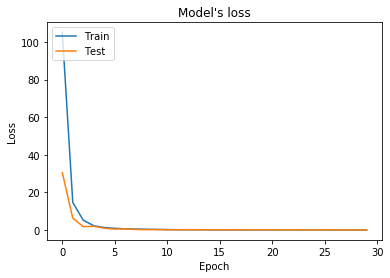

[[-0.17574708]] [[0.07705964]]

Model weights saved to: 'model_weights.h5'


In [2]:
import numpy as np
import pandas as pd

from keras.models import Model
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def CreateDataset(file):
    df = pd.read_csv(file)
    df.columns = ["x_coord", "y_coord", "month", "day",
                  "ffmc", "dmc", "dc", "isi", "temp",
                  "rh", "wind", "rain", "area"]
    np.random.seed(19)

    mms = MinMaxScaler()
    df["area"] = mms.fit_transform(df["area"].values.reshape(-1, 1))

    y = df.pop("area")
    X = df

    return X, y


def create_model():
    model = Sequential()

    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))    
    model.add(Dense(1, activation='linear'))
    
    opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
    
    return model

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.15, random_state=19)

    model = create_model()
    
    history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_test, y_test))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's loss")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("Training and test losses")
    plt.show()
    
    return model


def main():

    X, y = CreateDataset("data.csv")

    model = train_model(X, y)
    data1 = "6,5,9,6,92.5,121.1,674.4,8.6,25.1,27,4,0"
    data2 = "2,2,8,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0"

    data1 = np.array(list(map(float, data1.split(",")))).reshape(-1,1).T
    data2 = np.array(list(map(float, data2.split(",")))).reshape(-1,1).T
    predicted1 = model.predict(data1)
    predicted2 = model.predict(data2)

    print(predicted1, predicted2)
    
    model.save_weights("model_weights.h5")
    print("\nModel weights saved to: 'model_weights.h5'")


if __name__ == "__main__":
    main()
